
# capstone project notebook 3

### This notebook will focus on model evaluation

In [2]:
#import required libraries for handling and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#more libraries from the sklearn package will be imported later for modeling and evaluation
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_bal = pd.read_csv('balance.csv')

In [4]:
df_bal['SEVERITYCODE'].value_counts()

2    48052
1    48052
Name: SEVERITYCODE, dtype: int64

In [5]:
df_bal.reset_index(drop=True,inplace=True)
df_bal.head()

,SEVERITYCODE,RUSHHOUR,PCOUNT_OVER2,VCOUNT_IS2,INATTENTIONIND,UNDERINFL,SPEEDING,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [6]:
df_bal.shape

(96104, 17)

In [7]:
#now that the dataset is balanced, lets create our input feature and target variables..

#input features, X
X = df_bal.drop('SEVERITYCODE',axis=1)
X[0:5]

,RUSHHOUR,PCOUNT_OVER2,VCOUNT_IS2,INATTENTIONIND,UNDERINFL,SPEEDING,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
y = df_bal['SEVERITYCODE']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: SEVERITYCODE, dtype: int64

In [9]:
X.shape,y.shape

((96104, 16), (96104,))

# 5.0 Modeling
Now that the data is cleansed, processed and balanced, some Machine Learning models can be trained. Since this project is dealing with classification, several different methods will be used, including:

K Nearest Neighbor    
Decision Tree    
Support Vector Machines    
Logistic Regression   
First the data will be separated into train and test subsets. Some specific parameter tuning will be completed for each of the model types. Then the models will be evaluated using:   

Simple accuracy score    
Jaccard index   
F1-score   
Log-loss   
Area Under the ROC Curve   
Note: since processed feature set is all one-hot encoding (0s and 1s) the input variables do not need to be normalized   

In [13]:
#import the test-train method from sklearn and split the data.. this is necessary for all of the models
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [14]:
#using the test_train method, create test and train subsets of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (67272, 16) (67272,)
Test set: (28832, 16) (28832,)


## 5 Logistic Regression
For this algorithm we will look at modeling with liblinear, newton-cg and sag solvers. Some tuning may be required for the C parameter which controls regularization

In [15]:
# from sklearn import preprocessing, metrics, cross_validation

In [16]:
import numpy as np
from sklearn.metrics import jaccard_score

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [18]:
targetNames = df_bal['SEVERITYCODE'].unique().tolist()

In [19]:
# from sklearn.metrics import jaccard_similarity_score as jaccard_score

### 5.1.a LR model using the liblinear solver

In [20]:
#train an LR model using the liblinear solver
LR_lib = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lib_pred = LR_lib.predict(X_test)
lib_prob = LR_lib.predict_proba(X_test)
print('Jaccard similarity for liblinear Logistic Regression: ', jaccard_score(y_test, lib_pred))
print('Logloss for liblinear Logistic Regression: ', log_loss(y_test, lib_prob))
print('Test Accuracy for liblinear: ',metrics.accuracy_score(y_test,lib_pred))
print(confusion_matrix(y_test,lib_pred,labels=targetNames))
print(classification_report(y_test,lib_pred))

Jaccard similarity for liblinear Logistic Regression:  0.49216749061885756
Logloss for liblinear Logistic Regression:  0.5427897193198252
Test Accuracy for liblinear:  0.7042869034406215
[[ 8263  6121]
 [ 2405 12043]]
              precision    recall  f1-score   support

           1       0.77      0.57      0.66     14384
           2       0.66      0.83      0.74     14448

    accuracy                           0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.72      0.70      0.70     28832



In [21]:
#lr_acc = metrics.accuracy_score(y_test,lr_pred)


In [22]:
# LR = {'Logistic Regression': ['liblinear, C=0.01',lr_acc,lr_jac,lr_f1,lr_lgl,lr_roc]}

### 5.1b LR model using the newton-cg solver

In [23]:

#train an LR model using the newton-cg solver
LR_newt = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
newt_pred = LR_newt.predict(X_test)
newt_prob = LR_newt.predict_proba(X_test)
print('Jaccard similarity for Newton-cg Logistic Regression: ', jaccard_score(y_test, newt_pred))
print('Logloss for Newtong-cg Logistic Regression: ', log_loss(y_test, newt_prob))
print('Test Accuracy for Newton-cg: ',metrics.accuracy_score(y_test,newt_pred))
print(confusion_matrix(y_test,newt_pred,labels=targetNames))
print(classification_report(y_test,newt_pred))

Jaccard similarity for Newton-cg Logistic Regression:  0.49216749061885756
Logloss for Newtong-cg Logistic Regression:  0.5427925441224661
Test Accuracy for Newton-cg:  0.7042869034406215
[[ 8263  6121]
 [ 2405 12043]]
              precision    recall  f1-score   support

           1       0.77      0.57      0.66     14384
           2       0.66      0.83      0.74     14448

    accuracy                           0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.72      0.70      0.70     28832



### 5.2c LR model using the sag solver

In [24]:
#train an LR model using the sag solver
LR_sag = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
sag_pred = LR_sag.predict(X_test)
sag_prob = LR_sag.predict_proba(X_test)
print('Jaccard similarity for sag Logistic Regression: ', jaccard_score(y_test, sag_pred))
print('Logloss for sag Logistic Regression: ', log_loss(y_test, sag_prob))
print('Test Accuracy for sag: ',metrics.accuracy_score(y_test,sag_pred))
print(confusion_matrix(y_test,sag_pred,labels=targetNames))
print(classification_report(y_test,sag_pred))

Jaccard similarity for sag Logistic Regression:  0.49216749061885756
Logloss for sag Logistic Regression:  0.5427876820422463
Test Accuracy for sag:  0.7042869034406215
[[ 8263  6121]
 [ 2405 12043]]
              precision    recall  f1-score   support

           1       0.77      0.57      0.66     14384
           2       0.66      0.83      0.74     14448

    accuracy                           0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.72      0.70      0.70     28832



###  Observation: the liblinear solver achieves slightly better Jaccard, Log-loss and simple accuracy scores. Additionally, we see from looking at the confusion matrix that the liblinear model is slightly more balanced in predicting samples between the two classes. Lets look at whether we have the most optimum C value.

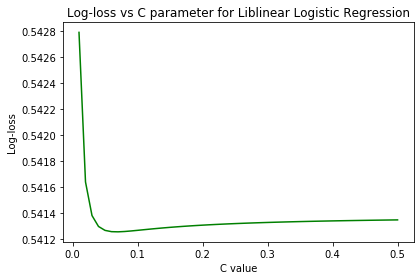

The best result is 0.5412554480316386 where C= 0.06999999999999999


In [25]:
#set up a for loop to iterate through multiple values for the C parameter
c_par = np.linspace(0.01,0.5,50) #set the C values that will be looped, 50 increments between C=0.01 and C=0.5

mean_log = np.zeros((len(c_par)))

for n in range(0,len(c_par)):
    LR_itr = LogisticRegression(C=c_par[n],solver='liblinear').fit(X_train,y_train)
    itr_prob = LR_itr.predict_proba(X_test)
    mean_log[n] = log_loss(y_test,itr_prob)
    
plt.plot(c_par,mean_log,'g')
plt.title('Log-loss vs C parameter for Liblinear Logistic Regression')
plt.ylabel('Log-loss')
plt.xlabel('C value')
plt.tight_layout()
plt.show()

print('The best result is', mean_log.min(), 'where C=', c_par[mean_log.argmin()])

In [26]:

#when comparing this to the original liblibear model (C=0.01), while the log-loss metric is improved, the jaccard
#and accuracy scores were slightly worse, and the confusion matrix had fewer correct predictions in both classes

#therefore, we'll keep the liblinear model with C=0.01 for final comparison with the other algorithms

lr_opt = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lr_pred = lr_opt.predict(X_test)
lr_prob = lr_opt.predict_proba(X_test)

print('Test set accuracy: ',metrics.accuracy_score(y_test,lr_pred))
print('Train set accuracy: ',metrics.accuracy_score(y_train,lr_opt.predict(X_train)))

Test set accuracy:  0.7042869034406215
Train set accuracy:  0.7041562611487692


In [27]:

#we have previously imported the jaccard, log-loss and f1 metrics, but there is one more we need to import
from sklearn.metrics import roc_auc_score

In [28]:
# #calculate simple accuracy

lr_acc = metrics.accuracy_score(y_test,lr_pred)

In [29]:
#calculate jaccard similarity scores
lr_jac = jaccard_score(y_test,lr_pred)

In [30]:
#calculate f1-scores
lr_f1 = jaccard_score(y_test,lr_pred,average='weighted')

In [31]:
#calculate log-loss
lr_lgl = log_loss(y_test,lr_prob)

In [32]:
lr_roc_prob = [p[1] for p in lr_prob]
lr_roc = roc_auc_score(y_test,lr_roc_prob)

In [33]:
#compile table of results to dictionary
results = {'Logistic Regression': ['liblinear, C=0.01',lr_acc,lr_jac,lr_f1,lr_lgl,lr_roc]}

In [34]:
#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']


In [35]:
#display results
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,Logistic Regression,"liblinear, C=0.01",0.704287,0.492167,0.538934,0.54279,0.789685



## 5.2 Support Vector Machines (SVM)
For this method, 'linear', 'rbf', 'polynomial' and 'sigmoid' kernels will be tested.

In [36]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import svm

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (76883, 16) (76883,)
Test set: (19221, 16) (19221,)


In [38]:
#svm model with linear function
svm_lin = svm.SVC(kernel='linear').fit(X_train,y_train)
svm_pred1 = svm_lin.predict(X_test)
print('Test Accuracy for SVM with Linear kernel: ', metrics.accuracy_score(y_test,svm_pred1))

Test Accuracy for SVM with Linear kernel:  0.7044378544300505


In [39]:
#confusion matrix & classification report
print(confusion_matrix(y_test,svm_pred1,labels=targetNames))
print(classification_report(y_test,svm_pred1))

[[5895 3705]
 [1976 7645]]
              precision    recall  f1-score   support

           1       0.75      0.61      0.67      9600
           2       0.67      0.79      0.73      9621

    accuracy                           0.70     19221
   macro avg       0.71      0.70      0.70     19221
weighted avg       0.71      0.70      0.70     19221



In [ ]:
#from sklearn import svm
#clf = svm.SVC(kernel='rbf')
#clf.fit(X_train, y_train) 

In [49]:
#yhat = clf.predict(X_test)
# yhat [0:5]

### 5.2b SVM model with rbf kernel function

In [40]:


svm_rbf = svm.SVC(kernel='rbf').fit(X_train,y_train)
svm_pred2 = svm_rbf.predict(X_test)
print('Test Accuracy for SVM with RBF kernel: ', metrics.accuracy_score(y_test,svm_pred2))
#confusion matrix and classification report
print(confusion_matrix(y_test,svm_pred2,labels=targetNames))
print(classification_report(y_test,svm_pred2))

Test Accuracy for SVM with RBF kernel:  0.7075594401956193
[[5780 3820]
 [1801 7820]]
              precision    recall  f1-score   support

           1       0.76      0.60      0.67      9600
           2       0.67      0.81      0.74      9621

    accuracy                           0.71     19221
   macro avg       0.72      0.71      0.70     19221
weighted avg       0.72      0.71      0.70     19221



### 5.2c svm model with polynomial kernel function

In [41]:

svm_poly = svm.SVC(kernel='poly').fit(X_train,y_train)
svm_pred3 = svm_poly.predict(X_test)
print('Test Accuracy for SVM with Polynomial kernel: ', metrics.accuracy_score(y_test,svm_pred3))
#confusion matrix and classification report
print(confusion_matrix(y_test,svm_pred3,labels=targetNames))
print(classification_report(y_test,svm_pred3))

Test Accuracy for SVM with Polynomial kernel:  0.7079756516310286
[[5661 3939]
 [1674 7947]]
              precision    recall  f1-score   support

           1       0.77      0.59      0.67      9600
           2       0.67      0.83      0.74      9621

    accuracy                           0.71     19221
   macro avg       0.72      0.71      0.70     19221
weighted avg       0.72      0.71      0.70     19221



### 5.2d svm model with sigmoid kernel function

In [42]:


svm_sig = svm.SVC(kernel='sigmoid').fit(X_train,y_train)
svm_pred4 = svm_sig.predict(X_test)
print('Test Accuracy for SVM with Sigmoid kernel: ', metrics.accuracy_score(y_test,svm_pred4))
#confusion matrix and classification report
print(confusion_matrix(y_test,svm_pred4,labels=targetNames))
print(classification_report(y_test,svm_pred4))

Test Accuracy for SVM with Sigmoid kernel:  0.6331096196868009
[[5974 3626]
 [3426 6195]]
              precision    recall  f1-score   support

           1       0.64      0.62      0.63      9600
           2       0.63      0.64      0.64      9621

    accuracy                           0.63     19221
   macro avg       0.63      0.63      0.63     19221
weighted avg       0.63      0.63      0.63     19221




### Observation:

the models built with linear, rbf and polynomial kernels all had similar accuracies around 0.71;   
however, the rbf and polynomial versions predicted more collisions to the injury classification,    
especially the polynomial kernel, which predicted 7335 to 11886. 
and  rbf (7581 to 11640)   
The sigmoid kernel model was more balanced in predicted both classes (9400 to 9821),but this came at the expense of accuracy, which was only 0.63.  

Test Accuracy for SVM with RBF kernel:  0.7075594401956193   
Test Accuracy for SVM with Polynomial kernel:  0.7079756516310286   
Test Accuracy for SVM with Sigmoid kernel:  0.6331096196868009   
Test Accuracy for SVM with Linear kernel:  0.7044378544300505   

An SVM with a linear kernel function seems best. It has marginally lower accuracy compared to the rbf/polynomial models (.71 vs .71), but it has the best balance between class predictions.    
This is important if the model should avoid overpredicting injury collisions,   
which might result in higher costs if the model is used to determine when to dispatch emergency response services

In [43]:
#re-train the linear SVM model, this time enabling probability prediction, which will be used later for AUROC/logloss eval

SVM_opt = svm.SVC(kernel='linear', probability=True).fit(X_train,y_train)
svm_pred = SVM_opt.predict(X_test)
print('Train set accuracy for SVM Linear: ',metrics.accuracy_score(y_train,SVM_opt.predict(X_train)))
print('Test set accuracy for SVM Linear: ',metrics.accuracy_score(y_test, svm_pred))

Train set accuracy for SVM Linear:  0.7015334989529545
Test set accuracy for SVM Linear:  0.7044378544300505


In [45]:
svm_prob = SVM_opt.predict_proba(X_test)

In [46]:

#calculate simple accuracy 
svm_acc = metrics.accuracy_score(y_test,svm_pred)

#calculate jaccard similarity scores
svm_jac = jaccard_score(y_test,svm_pred)

#calculate f1-scores
svm_f1 = jaccard_score(y_test,svm_pred,average='weighted')

#calculate log-loss
svm_lgl = log_loss(y_test,svm_prob)



In [47]:
svm_roc_prob = [p[1] for p in svm_prob]
svm_roc = roc_auc_score(y_test,svm_roc_prob)

In [48]:
#compile table of results to dictionary
results = {'SVM': ['linear kernel',svm_acc,svm_jac,svm_f1,svm_lgl,svm_roc]}


In [49]:
#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

In [50]:
# SVM display results
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,SVM,linear kernel,0.704438,0.509243,0.541502,0.603729,0.720455


In [51]:
#compile table of results to dictionary
results = {'SVM': ['linear kernel',svm_acc,svm_jac,svm_f1,svm_lgl,svm_roc],
          'Logistic Regression': ['liblinear, C=0.01',lr_acc,lr_jac,lr_f1,lr_lgl,lr_roc]}

#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

#display results
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,SVM,linear kernel,0.704438,0.509243,0.541502,0.603729,0.720455
1,Logistic Regression,"liblinear, C=0.01",0.704287,0.492167,0.538934,0.542790,0.789685


# cross validation like KFold and Hyperparameter 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold,GridSearchCV
import numpy as np

In [54]:
log_class = LogisticRegression()

In [55]:
grid ={'C' : 10.0** np.arange(-2,3), 'penalty' :['l1','l2']}

In [56]:
cv = KFold(n_splits= 5 , random_state =None, shuffle=False)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7)

In [59]:
clf = GridSearchCV(log_class,grid,cv=cv,n_jobs =-1 , scoring='f1_macro')

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((67272, 16), (28832, 16), (67272,), (28832,))

In [61]:
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [63]:
y_pred = clf.predict(X_test)

In [64]:
print(confusion_matrix(y_test,y_pred))

[[ 8873  5518]
 [ 3152 11289]]


In [65]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6992924528301887
              precision    recall  f1-score   support

           1       0.74      0.62      0.67     14391
           2       0.67      0.78      0.72     14441

    accuracy                           0.70     28832
   macro avg       0.70      0.70      0.70     28832
weighted avg       0.70      0.70      0.70     28832



### Random Forest Classifier

In [69]:
from sklearn.ensemble import  RandomForestClassifier

In [70]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
y_pred  = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8469  5922]
 [ 2745 11696]]
0.6993965038845728
              precision    recall  f1-score   support

           1       0.76      0.59      0.66     14391
           2       0.66      0.81      0.73     14441

    accuracy                           0.70     28832
   macro avg       0.71      0.70      0.70     28832
weighted avg       0.71      0.70      0.70     28832



In [72]:
y_train.value_counts()

1    33661
2    33611
Name: SEVERITYCODE, dtype: int64

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7)

In [75]:
# Modeliing
class_weight = dict({1:2,1:1})
classifier = RandomForestClassifier (class_weight = class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={1: 1})

In [76]:
# Prediction 

y_pred  = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8416  5906]
 [ 2624 11886]]
0.7041481687014428
              precision    recall  f1-score   support

           1       0.76      0.59      0.66     14322
           2       0.67      0.82      0.74     14510

    accuracy                           0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.71      0.70      0.70     28832



In [77]:
y_train.value_counts()

1    33730
2    33542
Name: SEVERITYCODE, dtype: int64

In [78]:
RFDT = RandomForestClassifier().fit(X_train,y_train)
DT_pred = RFDT.predict(X_test)
print('Accuracy for Decision Tree: ',metrics.accuracy_score(y_test,DT_pred))

Accuracy for Decision Tree:  0.7027608213096559


In [79]:
DT_prob = RFDT.predict_proba(X_test)

In [80]:
dt_acc = metrics.accuracy_score(y_test,DT_pred)
dt_jac = jaccard_score(y_test,DT_pred)


In [81]:
dt_f1 = jaccard_score(y_test,DT_pred,average='weighted')
dt_lgl = log_loss(y_test,DT_prob)

In [82]:
dt_roc_prob = [p[1] for p in DT_prob]
dt_roc = roc_auc_score(y_test,dt_roc_prob)

In [83]:
results = {'Decision Tree': ['Random Forest',dt_acc,dt_jac,dt_f1,dt_lgl,dt_roc]}

#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

#display results
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,Decision Tree,Random Forest,0.702761,0.498155,0.538515,0.556559,0.787344


In [85]:



#compile table of results to dictionary
results = {'Decision Tree': ['Random Forest',dt_acc,dt_jac,dt_f1,dt_lgl,dt_roc],
          'SVM': ['linear kernel',svm_acc,svm_jac,svm_f1,svm_lgl,svm_roc],
          'Logistic Regression': ['liblinear, C=0.01',lr_acc,lr_jac,lr_f1,lr_lgl,lr_roc]}

#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

#display results
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,Decision Tree,Random Forest,0.702761,0.498155,0.538515,0.556559,0.787344
1,SVM,linear kernel,0.704438,0.509243,0.541502,0.603729,0.720455
2,Logistic Regression,"liblinear, C=0.01",0.704287,0.492167,0.538934,0.542790,0.789685



# KNN
## Classification K nearest neighbor (KNN) Import library Classifier implementing the k-nearest neighbors vote.


In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (67272, 16) (67272,)
Test set: (28832, 16) (28832,)


In [89]:
k = 71
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=71)

In [90]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 2, 1, 1], dtype=int64)

In [91]:


#train a KNN model for k=71
KNN_opt = KNeighborsClassifier(n_neighbors=71).fit(X_train,y_train)
knn_pred = KNN_opt.predict(X_test)
print('Accuracy for KNN with k=71: ' ,metrics.accuracy_score(y_test,knn_pred))

Accuracy for KNN with k=71:  0.702656770255272


Ks = 71
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

lt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [92]:
#lets compare simple accuracy of the model for both train and test subsets to determine overfitting
print('Train set accuracy: ',metrics.accuracy_score(y_train,KNN_opt.predict(X_train)))
print('Test set accuracy: ',metrics.accuracy_score(y_test, knn_pred))

Train set accuracy:  0.7051522178618147
Test set accuracy:  0.702656770255272


In [93]:
#lets import a few other metric types from sklearn for further evaluation
from sklearn.metrics import classification_report, confusion_matrix
#list of prediction classes required for confusion matrix
targetNames = df_bal['SEVERITYCODE'].unique().tolist()

In [94]:
#display confision matrix and classification report for KNN model with k=250
print(confusion_matrix(y_test,knn_pred,labels=targetNames))
print(classification_report(y_test,knn_pred))

[[ 9177  5207]
 [ 3366 11082]]
              precision    recall  f1-score   support

           1       0.73      0.64      0.68     14384
           2       0.68      0.77      0.72     14448

    accuracy                           0.70     28832
   macro avg       0.71      0.70      0.70     28832
weighted avg       0.71      0.70      0.70     28832



In [99]:
knn_prob = KNN_opt.predict_proba(X_test)

In [95]:
knn_acc = metrics.accuracy_score(y_test,knn_pred)

In [96]:
knn_jac = jaccard_score(y_test,knn_pred)

In [97]:
knn_f1 = jaccard_score(y_test,knn_pred,average='weighted')

In [100]:
knn_lgl = log_loss(y_test,knn_prob)

In [101]:
#calculate area under ROC for each model
knn_roc_prob = [p[1] for p in knn_prob]
knn_roc = roc_auc_score(y_test,knn_roc_prob)

In [102]:
#compile table of results to dictionary
results = {'KNN': ['k=71',knn_acc,knn_jac,knn_f1,knn_lgl,knn_roc]}

#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

#display results
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,KNN,k=71,0.702657,0.517014,0.540472,0.545047,0.786708


#  Final Score 

In [106]:
#compile table of results to dictionary
results = {'KNN': ['k=71',knn_acc,knn_jac,knn_f1,knn_lgl,knn_roc],
          'Decision Tree': ['Random Forest',dt_acc,dt_jac,dt_f1,dt_lgl,dt_roc],
          'SVM': ['linear kernel',svm_acc,svm_jac,svm_f1,svm_lgl,svm_roc],
          'Logistic Regression': ['liblinear, C=0.01',lr_acc,lr_jac,lr_f1,lr_lgl,lr_roc]}

#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

#display results
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,KNN,k=71,0.702657,0.517014,0.540472,0.545047,0.786708
1,Decision Tree,Random Forest,0.702761,0.498155,0.538515,0.556559,0.787344
2,SVM,linear kernel,0.704438,0.509243,0.541502,0.603729,0.720455
3,Logistic Regression,"liblinear, C=0.01",0.704287,0.492167,0.538934,0.542790,0.789685


In [107]:
results_df

,Algorithm,Model feature,Accuracy,Jaccard,F1-score,Log-loss,AUROC
0,KNN,k=71,0.702657,0.517014,0.540472,0.545047,0.786708
1,Decision Tree,Random Forest,0.702761,0.498155,0.538515,0.556559,0.787344
2,SVM,linear kernel,0.704438,0.509243,0.541502,0.603729,0.720455
3,Logistic Regression,"liblinear, C=0.01",0.704287,0.492167,0.538934,0.542790,0.789685


## Evaluation Summary:  
The results are very similar for each of the different models. 

The Logistic Regression approach performed best for 2 of the 5 metrics: simple accuracy,and AUROC 
F1 and log loss  is SVM  

while the KNN algorithm was the best according to Jacard.  

the Logistic Regression model had the worst Jaccard similarity score of the 3 models.

Ultimately, the result are so similar that selecting a model might come down to its performance with respect to predicting against each classification.
If being conservative - predicting fewer injury collisions is preferred - 

then the SVM or KNN models might be best,
whereas the Logistic Regression and Decision Tree model might be preferable if higher sensitivity is required for predicting injury type collisions.